In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer# TEXT PROCESSING
import missingno as mns # CHECKING FOR MISSINGG
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

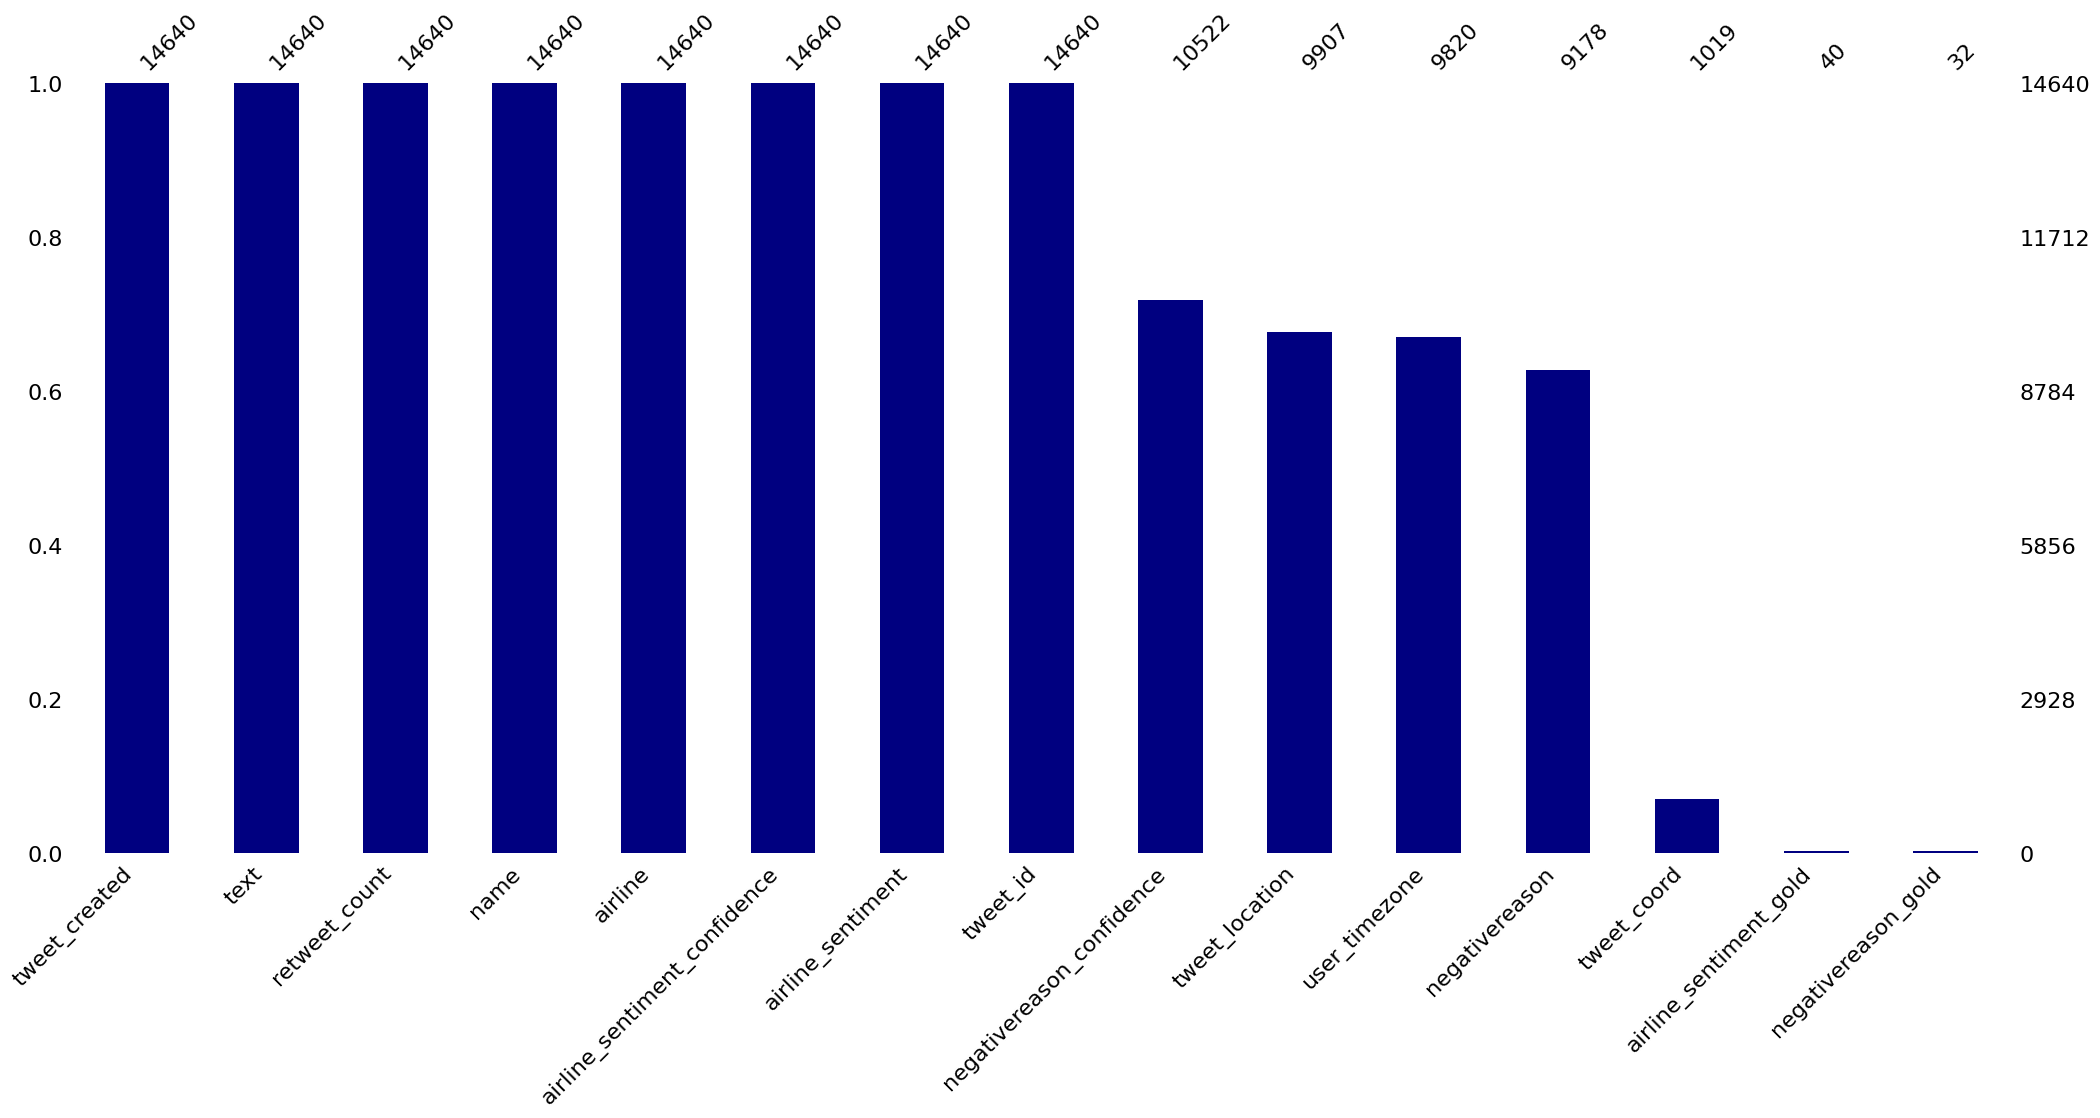

In [3]:
mns.bar(df,color='navy',sort='descending')

<Axes: xlabel='airline', ylabel='count'>

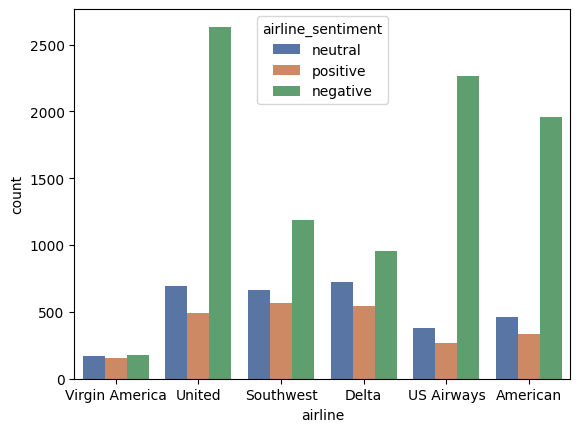

In [4]:
sns.countplot(df, x='airline', hue='airline_sentiment', palette='deep')

In [5]:
fig = px.histogram(df, x='airline',color='negativereason', text_auto=True, barmode='group')
fig.show()

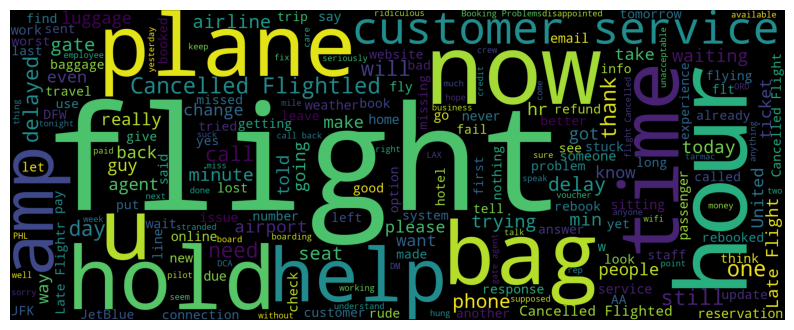

In [6]:
newdata = df[df['airline_sentiment'] == 'negative']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

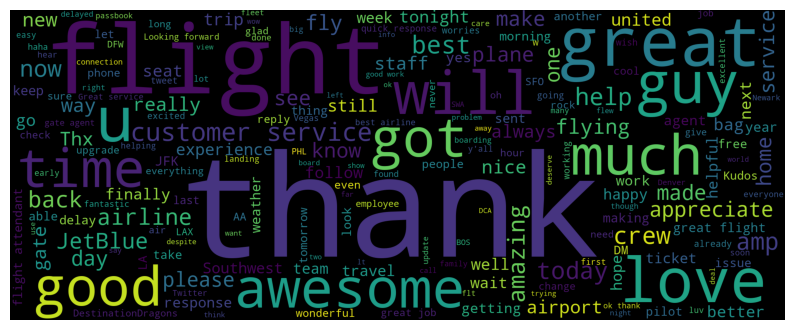

In [7]:
newdata = df[df['airline_sentiment'] == 'positive']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

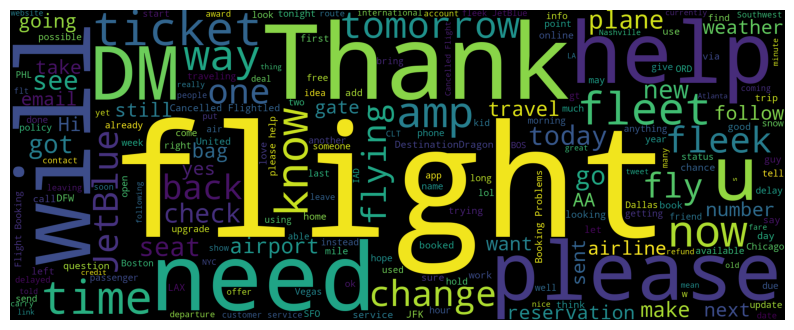

In [8]:
newdata = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [9]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocessing(x, stem =False):
    x =re.sub(text_cleaning_re, ' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(tokens)
df.text = df.text.apply(lambda x: preprocessing(x))

In [10]:
df['text'].head()

0                                   what dhepburn said
1    plus you ve added commercials to the experienc...
2    i didn t today must mean i need to take anothe...
3    it s really aggressive to blast obnoxious ente...
4             and it s a really big bad thing about it
Name: text, dtype: object

In [11]:
from sklearn.utils import resample 
df_negative = df[df['airline_sentiment']=='negative']
df_positive = df[df['airline_sentiment']=='positive']
df_neutral = df[df['airline_sentiment']=='neutral']

dfsam1 = resample(df_positive,n_samples=9178)
dfsam2 = resample(df_neutral,n_samples=9178)
df = pd.concat([df_negative,dfsam1,dfsam2])
df = df.sample(frac=1)

In [12]:
x = df.text
y = df['airline_sentiment']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2,random_state=400)

In [14]:
naivebayes = Pipeline([('vectorizer',CountVectorizer()),('Transformer',TfidfTransformer()),('Model',BernoulliNB())])
mlp = Pipeline([('vectorizer',CountVectorizer()),('Transformer',TfidfTransformer()),('Model',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [15]:
naivebayes.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])

In [16]:
pred1 = naivebayes.predict(xtest)
pred1

array(['neutral', 'positive', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [17]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

    negative       0.84      0.79      0.82      1818
     neutral       0.81      0.79      0.80      1876
    positive       0.82      0.91      0.86      1813

    accuracy                           0.83      5507
   macro avg       0.83      0.83      0.83      5507
weighted avg       0.83      0.83      0.83      5507



<Axes: >

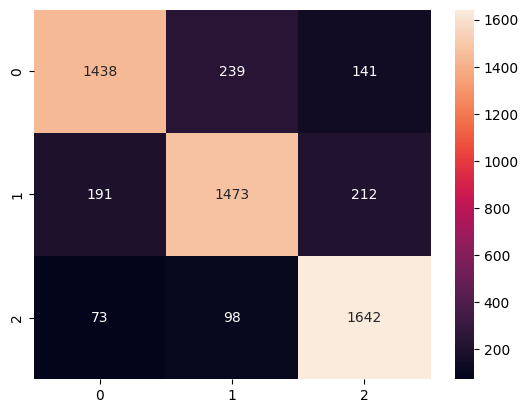

In [18]:
cm = confusion_matrix(ytest,pred1)
sns.heatmap(cm, annot =True, fmt ='0.5g')

In [19]:
# Insufficient data
# Poor data quality
# Over fitting
# Feature selection
# Model complexity
# Inbalance data

In [20]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
positive    9178
neutral     9178
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'vectorizer__ngram_range':[(1,1),(1,2)],
    'Transformer__use_idf':[True,False],
    'Model__alpha':[0.1,0.5,1.0]
}
naivebayes_tuning = Pipeline([('vectorizer',CountVectorizer()),('Transformer',TfidfTransformer()),('Model',BernoulliNB())])
grid_search = GridSearchCV(naivebayes_tuning, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('Transformer', TfidfTransformer()),
                                       ('Model', BernoulliNB())]),
             param_grid={'Model__alpha': [0.1, 0.5, 1.0],
                         'Transformer__use_idf': [True, False],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [23]:
print("Best paramters: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best paramters:  {'Model__alpha': 0.1, 'Transformer__use_idf': True, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation accuracy: 0.91


In [24]:
best_naivebayes_model = grid_search.best_estimator_
best_naivebayes_model.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('Transformer', TfidfTransformer()),
                ('Model', BernoulliNB(alpha=0.1))])

In [25]:
pred2 = best_naivebayes_model.predict(xtest)
pred2

array(['neutral', 'positive', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [26]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

    negative       0.96      0.85      0.90      1818
     neutral       0.90      0.92      0.91      1876
    positive       0.90      0.98      0.94      1813

    accuracy                           0.91      5507
   macro avg       0.92      0.91      0.91      5507
weighted avg       0.92      0.91      0.91      5507



<Axes: >

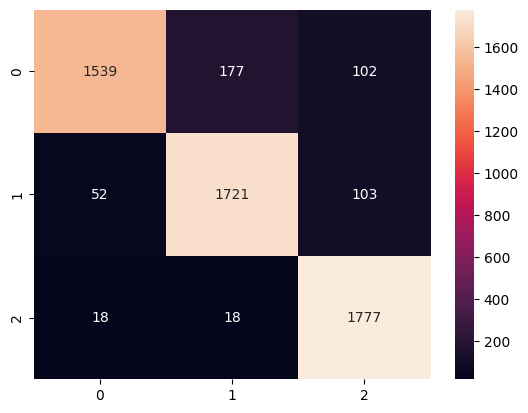

In [27]:
cm2 = confusion_matrix(ytest,pred2)
sns.heatmap(cm2,annot =True, fmt='0.5g')

In [28]:
mlp.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

In [29]:
pred3 = mlp.predict(xtest)
pred3

array(['neutral', 'positive', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')